In [3]:
import networkx as nx
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as pyt

Creamos los graficos que necesitemos

In [9]:
G1 = nx.erdos_renyi_graph(10, 0.4, seed=1) # 10 nodos, probabilidad de 0.4

G2 = nx.barabasi_albert_graph(10, 2, seed=1)

G3 = nx.watts_strogatz_graph(10, 2, 0.2, seed=1)

G4 = nx.random_tree(10, seed=1)

G5 = nx.stochastic_block_model([10, 10], [[1, 0.2], [0.2, 1]], seed=3)


In [10]:
def random_walk(G, start_node,destination_node):
    current_node = start_node
    path = [current_node]
    while current_node != destination_node:
        neighbors = list(G.neighbors(current_node))
        current_node = np.random.choice(neighbors)
        path.append(current_node)
    return path

# Now we are going to create the function hitting time, that calculates the number of steps it takes to go from one node to another using random walks

def hitting_time(G, start_node, destination_node, num_walks=1000):
    hitting_times = []
    # From node_i to node_j
    for _ in range(num_walks):
        path = random_walk(G, start_node, destination_node)
        hitting_times.append(len(path))
    # From node_j to node_i
    for _ in range(num_walks):
        path = random_walk(G, destination_node, start_node)
        hitting_times.append(len(path))
    return np.mean(hitting_times)

## EJERCICIO 1
Esta función calcula la matriz de hitting time, mediante dos bucles anidados. Por cada nodo del grafo calcula con `hitting_time` el tiempo que tarda en llegar 1000 veces con un random walk a un nodo destino. Se representará mediante la matriz (filas_nodo_origen, columnas_nodo_destino) 

In [11]:
def hit(G):
    M = np.zeros((len(G.nodes), len(G.nodes)))
    for i in range(len(G.nodes)):
        for j in range(i+1, len(G.nodes)):
            M[i, j] = hitting_time(G, i, j)
            M[j, i] = M[i, j]
    return M

hitG1 = hit(G1)
hitG2 = hit(G2)
hitG3 = hit(G3)
hitG4 = hit(G4)
hitG5 = hit(G5)

print(hitG1, '\n', hitG2, '\n', hitG3, '\n', hitG4, '\n', hitG5)



[[ 0.     10.3415 13.6245 16.3355 10.265  16.612  12.2955 13.834  34.141
   9.539 ]
 [10.3415  0.      9.761  14.692  10.282  13.6805  9.042  12.975  32.03
   8.8195]
 [13.6245  9.761   0.     14.5895 10.3855 10.39    8.743  12.2715 31.3505
   9.6255]
 [16.3355 14.692  14.5895  0.     10.1965 15.447  10.0125  9.8305 31.1535
  12.6715]
 [10.265  10.282  10.3855 10.1965  0.     10.046   7.221   8.0765 28.0145
   8.096 ]
 [16.612  13.6805 10.39   15.447  10.046   0.      9.6795 14.089  33.1215
  12.7545]
 [12.2955  9.042   8.743  10.0125  7.221   9.6795  0.      8.7615 27.826
   9.316 ]
 [13.834  12.975  12.2715  9.8305  8.0765 14.089   8.7615  0.     22.006
   9.851 ]
 [34.141  32.03   31.3505 31.1535 28.0145 33.1215 27.826  22.006   0.
  31.1365]
 [ 9.539   8.8195  9.6255 12.6715  8.096  12.7545  9.316   9.851  31.1365
   0.    ]] 
 [[ 0.     10.482  11.5645  6.578   8.1655 10.647  12.4285 11.5555 13.906
  15.321 ]
 [10.482   0.     19.3445 10.4665 13.971  16.135  17.4225 18.4435 18.712

In [22]:
print(np.mean(hitG1),np.mean(hitG2),np.mean(hitG3),np.mean(hitG4),np.mean(hitG5))

13.49865 13.11672 18.70065 22.8165 20.30318


## Conclusión 
Podemos ver claramente como según la media de hitting time que hemos sacado anteriormente, los dos grafos más rápidos serían el `erdos_renyi_graph` y el `barabasi_albert_graph` que concuerdan con los dos que mas conexiones tienen según la parte anterior de la práctica. Los dos que más tardan serían los grafos small world y el de tipo arbol, los dos que menos interconectados están y tienen que pasar por muchos mas nodos para llegar al nodo destino. El `Stochastic Block model` en este caso tiene el doble de nodos y es probable que tarde más debido a eso. Se podria aumentar las probabilidades para que las conexiones aumenten y la velocidad aumente, pero tambien aumentarán los recursos necesarios para crear y usar el grafo.

## Ejercicio 2
Esta funcion imprime en un mapa de colores los tiempos del hitting time anteriores, funciona tanto si le pasas un grafo como si le pasas una np.array

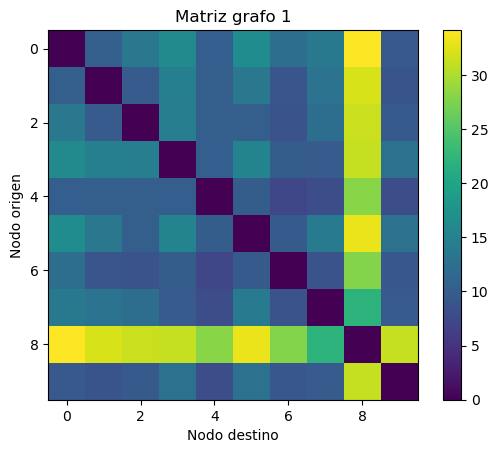

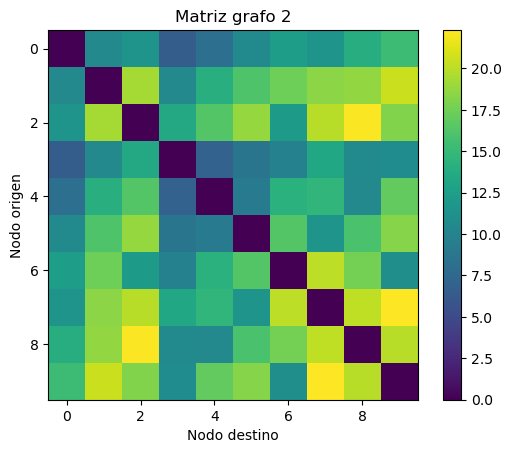

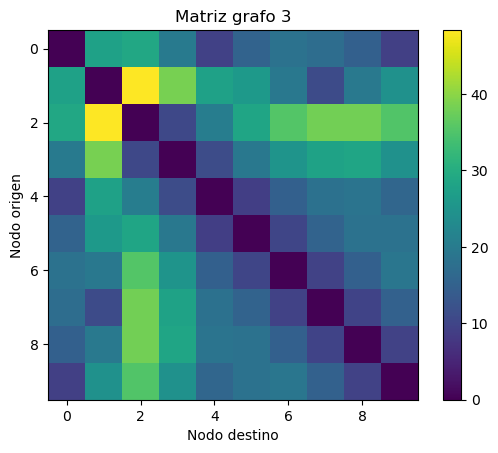

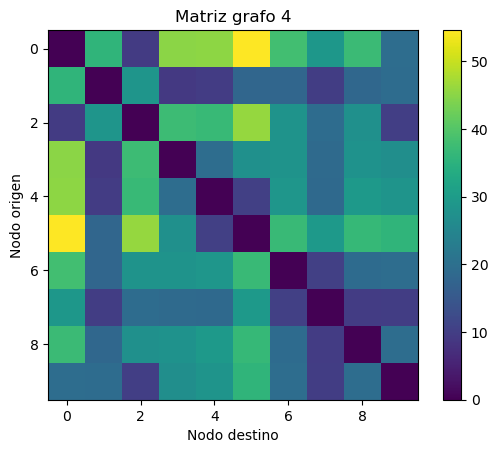

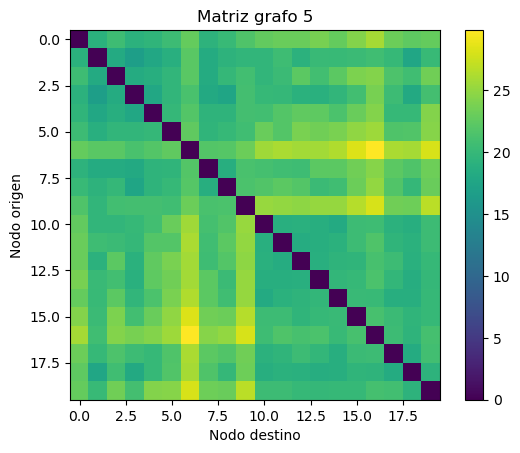

In [43]:
def imprimirColores(M, nombre=' de grafo'):
    if M.__class__ == nx.Graph: #basicamente he puesto que si la variable M es un grafo que saque antes la matriz de hits y si no pues que lo haga con la matriz de hits que le pases
        G = M
        M = hit(G)
    pyt.imshow(M)
    pyt.colorbar()
    pyt.title(('Matriz grafo '+ nombre ))
    pyt.xlabel('Nodo destino')
    pyt.ylabel('Nodo origen')
    pyt.show()
    
imprimirColores(hitG1, '1')
imprimirColores(hitG2, '2')
imprimirColores(hitG3, '3')
imprimirColores(hitG4, '4')
imprimirColores(hitG5, '5')


## Ejercicio 3
Esta vez en vez de dos bucles anidados usaremos uno y comprobaremos el hitting time de un solo nodo respecto a los demas nodos, los tiempos los guardaremos en una matriz`[1, num_nodos]` y la ordenaremos segun el numero del nodo y la posicion en la que ocupa en la matriz, de forma que se guardaran los nodos con un menor hitting time delante y detras los que tengan mas hitting time. Luego devolveremos desde la posicion 1 hasta la 4 ya que la primera siempre sera el nodo que le pasemos porque el nodo que le pasemos tardará 0 segundos a volver al mismo nodo ya que ya esta en él 

In [42]:

def hitNode(G, node):
    M = np.zeros(len(G.nodes))
    for i in range(len(G.nodes)):
        M[i] = hitting_time(G, node, i)
    mostEasyNodes = np.argsort(M)

    return mostEasyNodes[1:4]

print(hitNode(G3,4))



[5 0 3]
